In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
pwd

'C:\\Users\\21650'

In [3]:
import os
print("anger: ",len(os.listdir('CK/anger/')))
print("disgust: ",len(os.listdir('CK/disgust/')))
print("contempt: ",len(os.listdir('CK/contempt/')))
print("happy: ",len(os.listdir('CK/happy/')))
print("sadness: ",len(os.listdir('CK/sadness/')))
print("surprise: ",len(os.listdir('CK/surprise/')))

anger:  135
disgust:  177
contempt:  54
happy:  207
sadness:  84
surprise:  249


In [5]:
try:
    os.mkdir('CK/emotions')
    os.mkdir('CK/emotions/training')
    os.mkdir('CK/emotions/testing')
    
    os.mkdir('CK/emotions/training/anger')
    os.mkdir('CK/emotions/training/disgust')
    os.mkdir('CK/emotions/training/contempt')
    os.mkdir('CK/emotions/training/happy')
    os.mkdir('CK/emotions/training/sadness')
    os.mkdir('CK/emotions/training/surprise')
    
    os.mkdir('CK/emotions/testing/anger')
    os.mkdir('CK/emotions/testing/disgust')
    os.mkdir('CK/emotions/testing/contempt')
    os.mkdir('CK/emotions/testing/happy')
    os.mkdir('CK/emotions/testing/sadness')
    os.mkdir('CK/emotions/testing/surprise')
    
except OSError:
    pass

In [6]:
#splitting data into training and testing
import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
        

anger_DIR = "CK/anger/"
TRAINING_anger_DIR = "CK/emotions/training/anger/"
TESTING_anger_DIR = "CK/emotions/testing/anger/"

disgust_DIR = "CK/disgust/"
TRAINING_disgust_DIR = "CK/emotions/training/disgust/"
TESTING_disgust_DIR = "CK/emotions/testing/disgust/"

contempt_DIR = "CK/contempt/"
TRAINING_contempt_DIR = "CK/emotions/training/contempt/"
TESTING_contempt_DIR = "CK/emotions/testing/contempt/"

happy_DIR = "CK/happy/"
TRAINING_happy_DIR = "CK/emotions/training/happy/"
TESTING_happy_DIR = "CK/emotions/testing/happy/"

sadness_DIR = "CK/sadness/"
TRAINING_sadness_DIR = "CK/emotions/training/sadness/"
TESTING_sadness_DIR = "CK/emotions/testing/sadness/"

surprise_DIR = "CK/surprise/"
TRAINING_surprise_DIR = "CK/emotions/training/surprise/"
TESTING_surprise_DIR = "CK/emotions/testing/surprise/"


split_size = .9
split_data(anger_DIR, TRAINING_anger_DIR, TESTING_anger_DIR, split_size)
split_data(disgust_DIR, TRAINING_disgust_DIR, TESTING_disgust_DIR, split_size)
split_data(contempt_DIR, TRAINING_contempt_DIR, TESTING_contempt_DIR, split_size)
split_data(happy_DIR, TRAINING_happy_DIR, TESTING_happy_DIR, split_size)
split_data(sadness_DIR, TRAINING_sadness_DIR, TESTING_sadness_DIR, split_size)
split_data(surprise_DIR, TRAINING_surprise_DIR, TESTING_surprise_DIR, split_size)

In [7]:
print(len(os.listdir('CK/emotions/training/anger/')))
print(len(os.listdir('CK/emotions/testing/anger/')))

121
14


In [8]:
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
TRAINING_DIR = "CK/emotions/training/"
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size=(48,48),
                                                    batch_size=32,
                                                    color_mode="grayscale",
                                                    class_mode='categorical')

VALIDATION_DIR = "CK/emotions/testing/"
validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              target_size=(48,48),
                                                              batch_size=32,
                                                              color_mode="grayscale",
                                                              class_mode='categorical')

Found 813 images belonging to 6 classes.
Found 93 images belonging to 6 classes.


In [10]:
history = model.fit_generator(train_generator,
                              epochs=250,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/250
26/26 [==============================] - 10s 392ms/step - loss: 1.7065 - accuracy: 0.2435 - val_loss: 1.7274 - val_accuracy: 0.3118
Epoch 2/250
26/26 [==============================] - 7s 274ms/step - loss: 1.6585 - accuracy: 0.2669 - val_loss: 1.9170 - val_accuracy: 0.2903
Epoch 3/250
26/26 [==============================] - 7s 275ms/step - loss: 1.5856 - accuracy: 0.2977 - val_loss: 1.5043 - val_accuracy: 0.3441
Epoch 4/250
26/26 [==============================] - 7s 275ms/step - loss: 1.5007 - accuracy: 0.3604 - val_loss: 1.5440 - val_accuracy: 0.4624
Epoch 5/250
26/26 [==============================] - 7s 258ms/step - loss: 1.3840 - accuracy: 0.4133 - val_loss: 1.3835 - val_accuracy: 0.4409
Epoch 6/250
26/26 [==============================] - 7s 256ms/step - loss: 1.3423 - accuracy: 0.4170 - val_loss: 1.4146 - val_accuracy: 0.4624
Epoch 7/250
26/26 [==============================] - 7s 257ms/step - loss: 1.2901 - accuracy: 0.4723 - val_loss: 1.1867 - val_accuracy: 0.526

<Figure size 432x288 with 0 Axes>

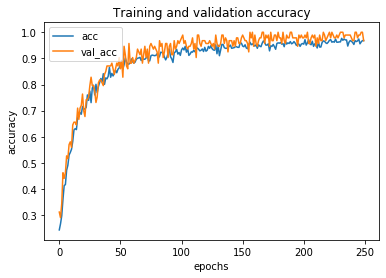

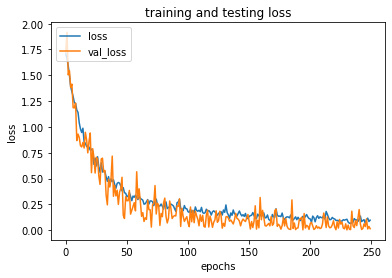

<Figure size 432x288 with 0 Axes>

In [11]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------


epochs=range(len('acc')) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy')
plt.legend(loc='upper left')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------

plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('training and testing loss')
plt.legend(loc='upper left')
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [12]:
model.save_weights('model2.h5')